<center><h1>Payapulli_Joshua_HW7</h1></center>

Name: Joshua Payapulli
<br>
Github Username: Payapulli
<br>
USC ID: 3751786221

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import make_scorer, accuracy_score, hamming_loss, precision_score, recall_score, f1_score, silhouette_score
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

### (a) Download the Anuran Calls (MFCCs) Data Set

In [2]:
df = pd.read_csv("../data/Anuran Calls/Frogs_MFCCs.csv")
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [3]:
# checking for formatting, missing values etc
# check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# check for NaNs
nan_values = df.isna().sum()
print("\nNumber of NaN values in each column:\n", nan_values)


# check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)

# checking unique values in categorical columns
print("\nUnique values in 'Family':\n", df['Family'].unique())
print("Unique values in 'Genus':\n", df['Genus'].unique())
print("Unique values in 'Species':\n", df['Species'].unique())

Missing values in each column:
 MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64

Number of NaN values in each column:
 MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64

Number of duplicate rows: 0

Unique values in 'Family':
 ['Leptodactylidae' 'Dendrobatidae' 'Hylidae' 'Bufonidae']
Unique values in 'Genus':
 ['Adenomera' 'Ameerega' 'Dendrop

In [4]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)
print("Training set: \n")
train_set

Training set: 



,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
2004,1.000000,0.327476,0.282440,0.572211,0.096509,-0.036705,-0.082174,0.146604,0.297338,-0.120902,...,0.218024,-0.042083,-0.126511,-0.090279,0.096176,0.191697,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,17
1194,1.000000,0.232818,-0.144331,-0.078909,-0.072467,0.255380,0.450215,0.261033,-0.168462,-0.281445,...,-0.291979,-0.042932,-0.009021,-0.032679,0.023912,0.041407,Dendrobatidae,Ameerega,Ameeregatrivittata,13
5359,0.966443,0.455914,1.000000,0.541650,-0.412873,0.307099,0.235819,-0.064025,0.069728,-0.052552,...,-0.049428,-0.053166,-0.026728,0.029443,0.019032,-0.105221,Hylidae,Hypsiboas,HypsiboasCinerascens,37
1756,1.000000,0.257873,0.112807,0.527614,0.186094,0.043683,-0.163682,-0.014125,0.196527,0.018839,...,0.226971,0.034969,-0.106029,-0.147124,0.042627,0.250249,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
497,1.000000,0.401859,0.563219,0.578304,-0.126517,-0.058725,0.431806,0.066801,-0.321014,0.155569,...,-0.002891,0.157072,-0.015251,-0.055428,0.086927,0.086006,Leptodactylidae,Adenomera,AdenomeraAndre,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,0.406366,0.268684,0.704863,0.358415,0.055376,-0.159812,0.065813,0.345068,0.175460,...,0.220504,0.054246,-0.069108,-0.174583,-0.032202,0.188263,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
5191,1.000000,0.634337,0.594395,0.403271,0.004960,0.037880,-0.065399,0.125276,0.106976,-0.223357,...,-0.140923,0.003646,0.007163,0.068718,0.047640,-0.179215,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5226,1.000000,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5390,0.931410,0.626137,1.000000,0.375834,-0.223044,0.325943,0.121659,-0.092542,0.163365,-0.049382,...,-0.054750,-0.054434,0.108092,0.156994,-0.051681,-0.085656,Hylidae,Hypsiboas,HypsiboasCinerascens,37


In [5]:
print("Test set: \n")
test_set

Test set: 



,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
3340,1.0,0.147506,0.014843,0.433466,0.169581,0.053135,-0.152020,-0.102427,0.153061,0.128628,...,0.285756,0.166246,-0.061206,-0.191878,0.003221,0.255371,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,21
5108,1.0,0.674174,0.767520,0.392177,0.035669,0.181548,-0.013677,0.187262,0.144679,-0.424524,...,-0.157943,-0.048913,-0.016129,0.129200,0.011245,-0.275909,Hylidae,Hypsiboas,HypsiboasCinerascens,36
6524,1.0,-0.007777,0.363276,0.413224,0.196296,0.222389,0.097128,-0.155608,-0.035013,0.133689,...,0.125169,0.044882,-0.013309,-0.026086,-0.088825,-0.018968,Hylidae,Hypsiboas,HypsiboasCordobae,43
3649,1.0,0.429359,0.297881,0.609120,0.263991,-0.030414,-0.160778,0.076217,0.285909,0.052029,...,0.230330,0.069015,-0.101196,-0.152351,0.039065,0.233823,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
1617,1.0,0.190599,0.062234,0.617262,0.208825,0.027108,-0.214441,0.009654,0.299053,0.039013,...,0.321598,0.128742,-0.152977,-0.223482,0.016131,0.250754,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1.0,0.469993,0.342252,0.508362,0.184239,0.138370,-0.070231,0.034221,0.226367,-0.001120,...,0.186595,-0.080672,-0.104266,-0.077342,0.159712,0.239398,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,14
142,1.0,0.162558,-0.115829,0.045608,0.226107,0.325952,0.157953,-0.124050,-0.009148,0.235613,...,-0.120102,-0.226043,-0.161989,0.037390,0.185305,0.059824,Leptodactylidae,Adenomera,AdenomeraAndre,4
1490,1.0,0.160219,0.137078,0.599525,0.252240,0.077200,-0.132288,-0.001605,0.244840,0.081377,...,0.275059,0.046851,-0.108847,-0.190397,-0.011276,0.217408,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
2574,1.0,0.523548,0.387887,0.539775,0.087532,0.028962,-0.025403,0.064718,0.215919,-0.005312,...,0.120708,-0.133983,-0.092651,0.011379,0.109798,0.100649,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,19


### (b) Train a classifier for each label

#### (i) Research

- Exact match - this is a strict metric which measures the percentage of samples where all of the labels have been classified correctly.
- Hamming score/loss - this is a less strict metric which measures the fraction of wrong labels divided by the total number of labels.

Reference: https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff

In [6]:
def calculate_exact_match(y_true, y_pred):
    total_instances = y_true.shape[0]
    match_count = np.sum(np.all(y_true.values == y_pred.values, axis=1))
    return match_count / total_instances

def calculate_hamming_score(y_true, y_pred):
    total_labels = np.prod(y_true.shape)
    correct_labels = np.sum(y_true.values == y_pred.values)
    return correct_labels / total_labels

def calculate_classification_metrics(y_true, y_pred, labels):
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for label in labels:
        # encoding the categorical data to numerical values
        encoder = LabelEncoder()
        y_true_encoded = encoder.fit_transform(y_true[label])
        y_pred_encoded = encoder.transform(y_pred[label])

        precision = precision_score(y_true_encoded, y_pred_encoded, average='macro')
        recall = recall_score(y_true_encoded, y_pred_encoded, average='macro')
        f1 = f1_score(y_true_encoded, y_pred_encoded, average='macro')

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)

    return (avg_precision, avg_recall, avg_f1)

#### (ii) Train a SVM for each of the labels

In [7]:
# get train/test x,y, dropping the recordID column
train_x, train_y = train_set.iloc[:,:-4], train_set.iloc[:,-4:-1]
test_x, test_y = test_set.iloc[:,:-4], test_set.iloc[:,-4:-1]

# standardizing train and test x
scaler = StandardScaler()
train_x_std = pd.DataFrame(scaler.fit_transform(train_x), columns=train_x.columns)
test_x_std = pd.DataFrame(scaler.fit_transform(test_x), columns=test_x.columns)

In [8]:
# initialize cross validation object
parameters = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}
svm = SVC(kernel='rbf')
clf = GridSearchCV(svm, parameters, cv=10)

In [9]:
labels = ['Family', 'Genus', 'Species']
preds = []
for label in tqdm(labels):    
    # training on standardized data
    clf.fit(train_x_std, train_y[label])
    best_model = clf.best_estimator_
    pred = best_model.predict(test_x_std)
    preds.append(pred)

    print(f"\n{label}")
    print(f"Best C: {clf.best_params_['C']}")
    print(f"Best Gamma: {clf.best_params_['gamma']}")

# combine predictions on individual labels to combined prediction
pred_df = pd.DataFrame(preds).T
pred_df.columns = labels

# evaluate performance for aggregated predictions
exact_match = calculate_exact_match(test_y, pred_df)
hamming_score = calculate_hamming_score(test_y, pred_df)

print(f"Exact match score: {exact_match}")
print(f"Hamming score: {hamming_score}")

precision, recall, f1 = calculate_classification_metrics(test_y, pred_df, labels)
print(f"Avg Precision: {precision}, Avg Recall: {recall}, Avg F1: {f1}")

 33%|█████████████████████████████████████▋                                                                           | 1/3 [02:45<05:31, 165.89s/it]


Family
Best C: 10
Best Gamma: 0.05


 67%|███████████████████████████████████████████████████████████████████████████▎                                     | 2/3 [07:01<03:38, 218.72s/it]


Genus
Best C: 100
Best Gamma: 0.05


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [10:59<00:00, 220.00s/it]


Species
Best C: 10
Best Gamma: 0.05
Exact match score: 0.98471514590088
Hamming score: 0.9901188821985487
Avg Precision: 0.9835616243730074, Avg Recall: 0.95637784191007, Avg F1: 0.9693033283655238


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [10]:
# initialize cross validation object
parameters = {'C': np.logspace(-3, 3, 7)}
svm = LinearSVC(penalty='l1', dual=False, max_iter=100000)
clf = GridSearchCV(svm, parameters, cv=10)

In [11]:
#l1 penalty
labels = ['Family', 'Genus', 'Species']
preds = []
for label in tqdm(labels):    
    # training on standardized data
    clf.fit(train_x_std, train_y[label])
    best_model = clf.best_estimator_
    pred = best_model.predict(test_x_std)
    preds.append(pred)

    print(f"\n{label}")
    print(f"Best C: {clf.best_params_['C']}")

# combine predictions on individual labels to combined prediction
pred_df = pd.DataFrame(preds).T
pred_df.columns = labels

exact_match_l1 = calculate_exact_match(test_y, pred_df)
hamming_score_l1 = calculate_hamming_score(test_y, pred_df)

print(f"Exact match score, L1 penalty: {exact_match_l1}")
print(f"Hamming score, L1 penalty: {hamming_score_l1}")

precision_l1, recall_l1, f1_l1 = calculate_classification_metrics(test_y, pred_df, labels)
print(f"Avg Precision: {precision_l1}, Avg Recall: {recall_l1}, Avg F1: {f1_l1}")

 33%|██████████████████████████████████████                                                                            | 1/3 [00:28<00:57, 28.91s/it]


Family
Best C: 1.0


 67%|████████████████████████████████████████████████████████████████████████████                                      | 2/3 [01:37<00:52, 52.07s/it]


Genus
Best C: 10.0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:49<00:00, 56.37s/it]


Species
Best C: 10.0
Exact match score, L1 penalty: 0.9092172301991662
Hamming score, L1 penalty: 0.9413308630538829
Avg Precision: 0.8435458305064794, Avg Recall: 0.7747601653555088, Avg F1: 0.7924452328136488


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [12]:
parameters = {'C': np.logspace(-3, 3, 7)}
svm = LinearSVC(penalty='l1', dual=False, max_iter=100000)
clf = GridSearchCV(svm, parameters, cv=10)

In [13]:
# smote
labels = ['Family', 'Genus', 'Species']
preds = []
for label in tqdm(labels):
    # apply SMOTE to data first
    smote = SMOTE()
    train_x_smote, train_y_smote = smote.fit_resample(train_x_std, train_y[label])
    
    # training the model on standardized and SMOTE-applied data
    clf.fit(train_x_smote, train_y_smote)
    best_model = clf.best_estimator_
    pred = best_model.predict(test_x_std)
    preds.append(pred)

    print(f"\n{label}")
    print(f"Best C: {clf.best_params_['C']}")

# combine predictions on individual labels to combined prediction
pred_df = pd.DataFrame(preds).T
pred_df.columns = labels

# Evaluate performance for aggregated predictions
exact_match_smote = calculate_exact_match(test_y, pred_df)
hamming_score_smote = calculate_hamming_score(test_y, pred_df)

print(f"Exact match score, L1 penalty: {exact_match_smote}")
print(f"Hamming score, L1 penalty: {hamming_score_smote}")

precision_smote, recall_smote, f1_smote = calculate_classification_metrics(test_y, pred_df, labels)
print(f"Avg Precision: {precision_smote}, Avg Recall: {recall_smote}, Avg F1: {f1_smote}")

 33%|█████████████████████████████████████▋                                                                           | 1/3 [02:01<04:03, 121.71s/it]


Family
Best C: 10.0


 67%|███████████████████████████████████████████████████████████████████████████▎                                     | 2/3 [10:11<05:37, 337.98s/it]


Genus
Best C: 10.0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [20:46<00:00, 415.56s/it]


Species
Best C: 100.0
Exact match score, L1 penalty: 0.8666049096804076
Hamming score, L1 penalty: 0.9275899336112398
Avg Precision: 0.8007884053349327, Avg Recall: 0.9177310425351907, Avg F1: 0.8415522885584554


In [14]:
results = [
    {"Model": "SVM", "Exact Match": exact_match, "Hamming Score": hamming_score, 
     "Avg Precision": precision, "Avg Recall": recall, "Avg F1": f1},
    {"Model": "L1 Penalty", "Exact Match": exact_match_l1, "Hamming Score": hamming_score_l1,
     "Avg Precision": precision_l1, "Avg Recall": recall_l1, "Avg F1": f1_l1},
    {"Model": "SMOTE", "Exact Match": exact_match_smote, "Hamming Score": hamming_score_smote,
     "Avg Precision": precision_smote, "Avg Recall": recall_smote, "Avg F1": f1_smote}
]
results_df = pd.DataFrame(results)
results_df

,Model,Exact Match,Hamming Score,Avg Precision,Avg Recall,Avg F1
0,SVM,0.984715,0.990119,0.983562,0.956378,0.969303
1,L1 Penalty,0.909217,0.941331,0.843546,0.774760,0.792445
2,SMOTE,0.866605,0.927590,0.800788,0.917731,0.841552


We can see from the above table that the original SVM model with no L1 penalty and no SMOTE resampling performs the best, even in terms of recall which we can typically expect SMOTE to improve for imbalanced datasets.

Between the L1 Penalty model and the L1 Penalty with SMOTE model it is less clear. The L1 penalty model performs better in terms of exact match, hamming score and precision but if we are particularly interested in reducing False Negatives (Recall) and F1 score then we might choose the SMOTE model instead.

However, assuming that we are not especially interested in recall/F1 then I will rank the models as below:
1. SVM
2. L1 Penalty
3. SMOTE

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

I am using silhouette score to determine k.

In [15]:
# get combined X and y df
X, Y = df.iloc[:,:-4], df.iloc[:,-4:-1]

In [16]:
def get_best_k(max_k, rand):
    best_score = -1
    best_k = 2
    best_labels = None

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=rand).fit(X)
        # using silhouette score to determine best k
        score = silhouette_score(X, kmeans.labels_)
        if score > best_score:
            best_score = score
            best_k = k
            best_labels = kmeans.labels_
    return best_k, best_labels

# Monte-Carlo Simulation
cluster_assignments = []
best_ks = []
for i in tqdm(range(50)):
    best_k, cluster_assignment = get_best_k(50, i)
    best_ks.append(best_k)
    cluster_assignments.append(cluster_assignment)

avg_best_k = np.mean(best_ks)
std_dev_best_k = np.std(best_ks)
print("Average Optimal k:", avg_best_k)
print("Standard Deviation of Optimal k:", std_dev_best_k)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [1:17:44<00:00, 93.29s/it]

Average Optimal k: 4.0
Standard Deviation of Optimal k: 0.0


### (b) Determine which family is the majority

As we can see from the above section that in all of the Monte Carlo simulations the best_k was determined to be 4, as our std dev of best_ks is 0. This makes things more straightforward in part b and part c as we only have to consider the cluster to labels mapping for only the clusters labelled 0 - 3.

In [18]:
# round best k to an integer
best_k = int(avg_best_k)
kmeans = KMeans(n_clusters=best_k, n_init=10).fit(X)

# add cluster labels to original df
labeled_data = df.copy()
cluster_labels = kmeans.labels_
labeled_data['Cluster'] = cluster_labels

def get_majority_class(df, cluster_id, label):
    cluster_data = df[df['Cluster'] == cluster_id]
    most_common = Counter(cluster_data[label]).most_common(1)
    return most_common[0][0]

results = []
# add labels for each cluster
for cluster in range(best_k):
    majority_family = get_majority_class(labeled_data, cluster, 'Family')
    majority_genus = get_majority_class(labeled_data, cluster, 'Genus')
    majority_species = get_majority_class(labeled_data, cluster, 'Species')

    results.append({
        "Cluster": cluster,
        "Majority Family": majority_family,
        "Majority Genus": majority_genus,
        "Majority Species": majority_species
    })

cluster_to_label = pd.DataFrame(results)
print("Cluster to label mapping:\n")
cluster_to_label

Cluster to label mapping:



,Cluster,Majority Family,Majority Genus,Majority Species
0,0,Hylidae,Hypsiboas,HypsiboasCordobae
1,1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,3,Leptodactylidae,Adenomera,AdenomeraAndre


### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [20]:
# we take our prediction from part 2a and use the mapping df we got from part 2b
# and use this to convert our clustering assignments to labels
def map_clusters_to_labels(clusters_row):
    mapped_families = []
    mapped_genus = []
    mapped_species = []

    # iterating over each cluster in the row
    for cluster in clusters_row:
        labels = cluster_to_label[cluster_to_label['Cluster'] == cluster]
        mapped_families.append(labels.iloc[0]['Majority Family'])
        mapped_genus.append(labels.iloc[0]['Majority Genus'])
        mapped_species.append(labels.iloc[0]['Majority Species'])

    return pd.DataFrame({'Family': mapped_families, 'Genus': mapped_genus, 'Species': mapped_species})

# loop over all the Monte Carlo sims
labelled_simulations = []
for row in tqdm(cluster_assignments):
    labelled_df = map_clusters_to_labels(row)
    labelled_simulations.append(labelled_df)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:43<00:00,  1.16it/s]


In [21]:
def calculate_hamming_metrics(predicted_labels, true_labels):
    # 3 cols in our Y df
    total_labels = len(true_labels) * 3
    # hamming dist equals number of mismatches
    hamming_distance = np.sum(predicted_labels != true_labels)
    hamming_loss = hamming_distance / total_labels
    hamming_score = 1 - hamming_loss
    return hamming_distance, hamming_score, hamming_loss


hamming_distances = []
hamming_scores = []
hamming_losses = []
for labelled_sim in labelled_simulations:
    # loop through each Monte Carlo sim and calculate hamming metrics
    hamming_distance, hamming_score, hamming_loss = calculate_hamming_metrics(labelled_sim, Y)
    hamming_distances.append(hamming_distance)
    hamming_scores.append(hamming_score)
    hamming_losses.append(hamming_loss)

average_hamming_distance = np.mean(hamming_distances)
std_dev_hamming_distance = np.std(hamming_distances)
average_hamming_score = np.mean(hamming_scores)
average_hamming_loss = np.mean(hamming_losses)

print("Average Hamming Distance:", average_hamming_distance)
print("Standard Deviation of Hamming Distance:", std_dev_hamming_distance)
print("Average Hamming Score:", average_hamming_score)
print("Average Hamming Loss:", average_hamming_loss)

Average Hamming Distance: 4683.326666666667
Standard Deviation of Hamming Distance: 1966.1469849993978
Average Hamming Score: 0.7830286464365687
Average Hamming Loss: 0.2169713535634314


## 3. ISLR 12.6.2

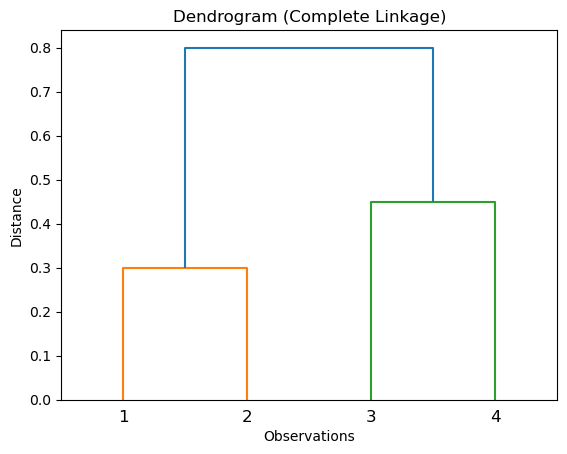

In [44]:
# part a
DM = np.array([
    [0, 0.3, 0.4, 0.7],
    [0.3, 0, 0.5, 0.8],
    [0.4, 0.5, 0, 0.45],
    [0.7, 0.8, 0.45, 0]
])

condensed_DM = squareform(DM)

# hierarchical clustering using complete linkage
complete_linkage = linkage(condensed_DM, method='complete')

dendrogram(complete_linkage, labels=['1', '2', '3', '4'])
plt.title("Dendrogram (Complete Linkage)")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.show()

- 1,2: merge at height 0.3
- 3,4: merge at height 0.45
- {1,2}, {3,4}: merge at height 0.8

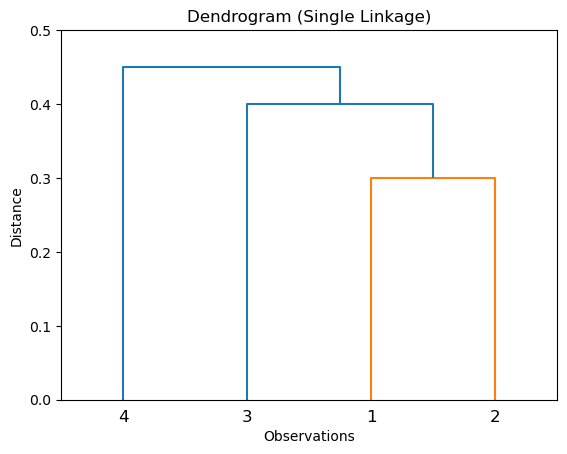

In [43]:
# part b
single_linkage = linkage(condensed_DM, 'single')
dendrogram(single_linkage, labels=['1', '2', '3', '4'], show_leaf_counts=True)
plt.ylim(0, 0.5)
plt.title('Dendrogram (Single Linkage)')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()

- 1,2: merge at 0.3
- 3, {1,2}: merge at 0.4
- 4, {1,2,3}: merge at 0.45

part c:

{1,2} and {3, 4}

part d:

{1,2,3} and {4}

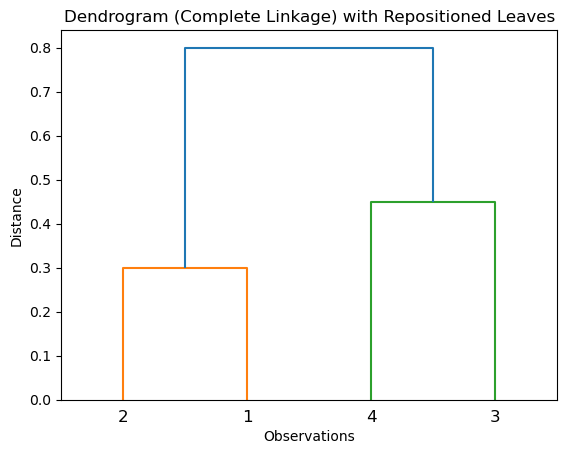

In [45]:
# change the order of the labels to reposition the leaves
dendrogram(complete_linkage, labels=['2', '1', '4', '3'])
plt.title("Dendrogram (Complete Linkage) with Repositioned Leaves")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.show()